# Entregável 1 - visão computacional

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.4.4 


# Equalização de histograma

In [2]:
rintin = cv2.imread("RinTinTin.jpg")

In [3]:
rintin.shape

(240, 320, 3)

In [4]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [5]:
rintin_gray.shape

(240, 320)

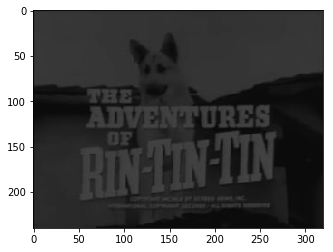

In [6]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

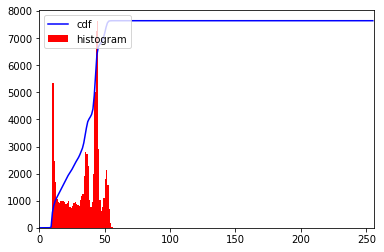

In [7]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Crie uma imagem derivada da imagem fornecida que use melhor a faixa dinâmica, ou seja, tenha o valor dos seus pixels distribuídos entre `0` e `255`. 
3. Plote a imagem pedida

In [9]:


a = 5.1
b = -40.8
nova_lista = []

for linha in rintin_gray:
    nova_linha = []
    for numero in linha:
        novo = numero * a + b
        nova_linha.append(novo)
    nova_lista.append(nova_linha)
    
nova_imagem = np.asarray(nova_lista)
nova_imagem.shape



(240, 320)

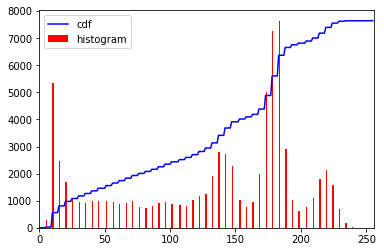

In [10]:
hist,bins = np.histogram(nova_imagem.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(nova_imagem.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

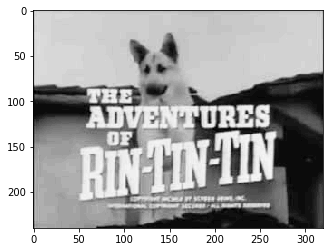

In [11]:
plt.imshow(nova_imagem, cmap="Greys_r", vmin=0, vmax=255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


In [1]:


box = cv2.imread("hall_box_battery1.jpg")
box_rgb = cv2.cvtColor(box, cv2.COLOR_BGR2RGB)
# plt.imshow(box_rgb,interpolation="none")



NameError: name 'cv2' is not defined

In [ ]:


box_r = box_rgb[:,:,0]
plt.imshow(box_r, cmap='Greys_r')



In [ ]:


hist,bins = np.histogram(box_r.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(box_r.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()



In [ ]:
box_b = box_rgb[:,:,2]
plt.imshow(box_b, cmap='Greys_r')

In [ ]:


only_box_r = []

for linha in box_r:
    nova_linha = []
    for pixel in linha:
        if pixel > 150:
            nova_linha.append(pixel)
        else:
            nova_linha.append(0)
    only_box_r.append(nova_linha)
    
only_box_r = np.array(only_box_r)
plt.imshow(only_box_r, cmap='Greys_r')



In [ ]:
only_box_r = box_rgb.copy()

for linha in range(box_rgb.shape[0]):
    for coluna in range(box_rgb.shape[1]):
        if int(box_rgb[linha, coluna, 0]) - int(box_rgb[linha, coluna, 1]) > 60 and int(box_rgb[linha, coluna, 0]) - int(box_rgb[linha, coluna, 2]) > 60:
            only_box_r[linha][coluna] = 255
        else:
            only_box_r[linha][coluna] = 0

plt.imshow(only_box_r, cmap='Greys_r')

In [ ]:


only_box_r = box_rgb.copy()

for linha in range(box_rgb.shape[0]):
    for coluna in range(box_rgb.shape[1]):
        if int(box_rgb[linha, coluna, 0]) - int(box_rgb[linha, coluna, 1]) > 60 and int(box_rgb[linha, coluna, 0]) - int(box_rgb[linha, coluna, 2]) > 60:
            only_box_r[linha][coluna][0] = 255
            only_box_r[linha][coluna][1] = 0
            only_box_r[linha][coluna][2] = 0
        else:
            only_box_r[linha][coluna][0] = 0
            only_box_r[linha][coluna][1] = 0
            only_box_r[linha][coluna][2] = 0
            
plt.imshow(only_box_r, cmap='Greys_r')



# Atividade 3


Abra a imagem `hall_box_battery_atividade3.png`  e a converta para tons de cinza de `0` a `255`.

Forneça como saída uma uma cópia da imagem  em que cada pixel  recebe o módulo da subtração entre o pixel que vem depois e o que vem antes dele.

Obs.: O conceito de *antes* e *depois* pode ser na horizontal ou na vertical

Apresente a imagem resultado, deve ficar parecida com a imagem `gabarito_atividade_3.png`.

<img src="gabarito_atividade_3.png" width=400>

In [ ]:
box3 = cv2.imread("hall_box_battery_atividade3.png")
box3_rgb = cv2.cvtColor(box3, cv2.COLOR_BGR2GRAY)


In [ ]:
ativ3_rgb = box3_rgb.copy()

for linha in range(box3_rgb.shape[0]):
    for coluna in range(1,box3_rgb.shape[1] - 1):
        subtracao = int(box3_rgb[linha][coluna+1]) - int(box3_rgb[linha][coluna-1])
        if subtracao >= 0 and subtracao <= 255:
            ativ3_rgb[linha][coluna] = subtracao
        else:
            if subtracao < 0:
                subtracao = abs(subtracao)
            ativ3_rgb[linha][coluna] = subtracao

plt.imshow(ativ3_rgb, cmap='Greys_r')

